## Project 4 - CNN classification and Transfer Learning

### 0. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation, Dense, Flatten, Dropout ,Input, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.optimizers import SGD, Adam, RMSprop
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD, Adam, RMSprop
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### 1. Load Data

In [8]:
train_data = 'fruits-360_100x100\\data\\Training'
test_data = 'fruits-360_100x100\\data\\Test'
def get_data(path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np.array(data['target'])
    target_labels = np.array(data['target_names'])
    return files,targets,target_labels
 
X_train_path, Y_train_path, labels = get_data(train_data)
X_test_path, Y_test_path,_ = get_data(test_data)

Y_train = to_categorical(Y_train_path, len(set(labels)))
Y_test = to_categorical(Y_test_path, 207)

In [3]:
X_test_path[10101]

np.str_('fruits-360_100x100\\data\\Test\\Tomato Maroon 1\\r_40_100.jpg')

#### Split Train set into training and validation sets

In [9]:
X_train_path, X_val_path, Y_train, Y_val = train_test_split(X_train_path,Y_train,test_size=0.1)
# # print(X_train.shape)
# # print(X_val.shape)

#### Preprocessing

In [10]:
import cv2
def convert_image_to_array(files):
    images = []
    for path in files:
        img = cv2.imread(path)  
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
        img = img.astype(np.float16)/255     
        images.append(img)
    return np.array(images)

X_test=convert_image_to_array(X_test_path)
X_val=convert_image_to_array(X_val_path)
X_train=convert_image_to_array(X_train_path)

#### Normalize data in the range of 0 to 1

In [7]:
# # # #Normalize data in the range of 0 to 1

### 2. First Approach: Build CNN Model

In [8]:
model = Sequential()
#
#
#
#
model.add(Input(shape=(100,100,3)))

model.add(Conv2D(filters=16,kernel_size=2,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=2,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=2,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128,kernel_size=2,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(rate=0.3))
model.add(Flatten())
model.add(Dense(units=200,activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(units=207,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 100, 100, 16)   │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 100, 100, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 50, 50, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 50, 50, 32)     │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 50, 50, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 25, 25, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 25, 25, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │       921,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 207)            │        41,607 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,007,807 (3.84 MB)

 Trainable params: 1,007,327 (3.84 MB)

 Non-trainable params: 480 (1.88 KB)

#### Train CNN

In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

optimizer = Adam(learning_rate=1e-4)
#
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])




checkpointer = ModelCheckpoint(
    filepath='best_model.h5',         
    monitor='val_accuracy',           
    save_best_only=True,             
    save_weights_only=False,         
    mode='max',                       
    verbose=1
)



train_datagen = ImageDataGenerator(
    rescale=1./255,       
    validation_split=0.2 
)



train_generator = train_datagen.flow_from_directory(
    directory='fruits-360_100x100/data/Training', 
    target_size=(100, 100),   
    batch_size=128,             
    class_mode='categorical',  
    subset='training',         
    shuffle=True,
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    directory='fruits-360_100x100/data/Training',
    target_size=(100, 100),
    batch_size=128,
    class_mode='categorical',
    subset='validation',      
    shuffle=True,
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1/255)

Found 83631 images belonging to 207 classes.
Found 20825 images belonging to 207 classes.


In [10]:
CNN_model = model.fit(train_generator,epochs=5,validation_data=validation_generator, shuffle=True,callbacks=[checkpointer])

c:\Users\www.Amirpc.com\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.2249 - loss: 3.8783
Epoch 1: val_accuracy improved from None to 0.87880, saving model to best_model.h5


654/654 ━━━━━━━━━━━━━━━━━━━━ 185s 279ms/step - accuracy: 0.4562 - loss: 2.4518 - val_accuracy: 0.8788 - val_loss: 0.5665
Epoch 2/5
654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.8431 - loss: 0.5588
Epoch 2: val_accuracy improved from 0.87880 to 0.95429, saving model to best_model.h5


654/654 ━━━━━━━━━━━━━━━━━━━━ 120s 184ms/step - accuracy: 0.8774 - loss: 0.4362 - val_accuracy: 0.9543 - val_loss: 0.1684
Epoch 3/5
654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 0.9398 - loss: 0.2116
Epoch 3: val_accuracy improved from 0.95429 to 0.96519, saving model to best_model.h5


654/654 ━━━━━━━━━━━━━━━━━━━━ 122s 187ms/step - accuracy: 0.9479 - loss: 0.1820 - val_accuracy: 0.9652 - val_loss: 0.1243
Epoch 4/5
654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9694 - loss: 0.1108
Epoch 4: val_accuracy improved from 0.96519 to 0.96888, saving model to best_model.h5


654/654 ━━━━━━━━━━━━━━━━━━━━ 121s 185ms/step - accuracy: 0.9727 - loss: 0.0993 - val_accuracy: 0.9689 - val_loss: 0.1025
Epoch 5/5
654/654 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.9815 - loss: 0.0672
Epoch 5: val_accuracy improved from 0.96888 to 0.97152, saving model to best_model.h5


654/654 ━━━━━━━━━━━━━━━━━━━━ 120s 184ms/step - accuracy: 0.9837 - loss: 0.0613 - val_accuracy: 0.9715 - val_loss: 0.1015


#### Evaluate the First Approach

In [11]:
from tensorflow.keras.models import load_model

model = load_model('best_model.h5')


results = model.evaluate(X_test,Y_test, verbose=1)

print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]*100:.2f}%")


1090/1090 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9761 - loss: 0.0814
Test Loss: 0.0814
Test Accuracy: 97.61%


In [12]:
Y_pred=model.predict(X_test)

1090/1090 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step


#### Visualize Data

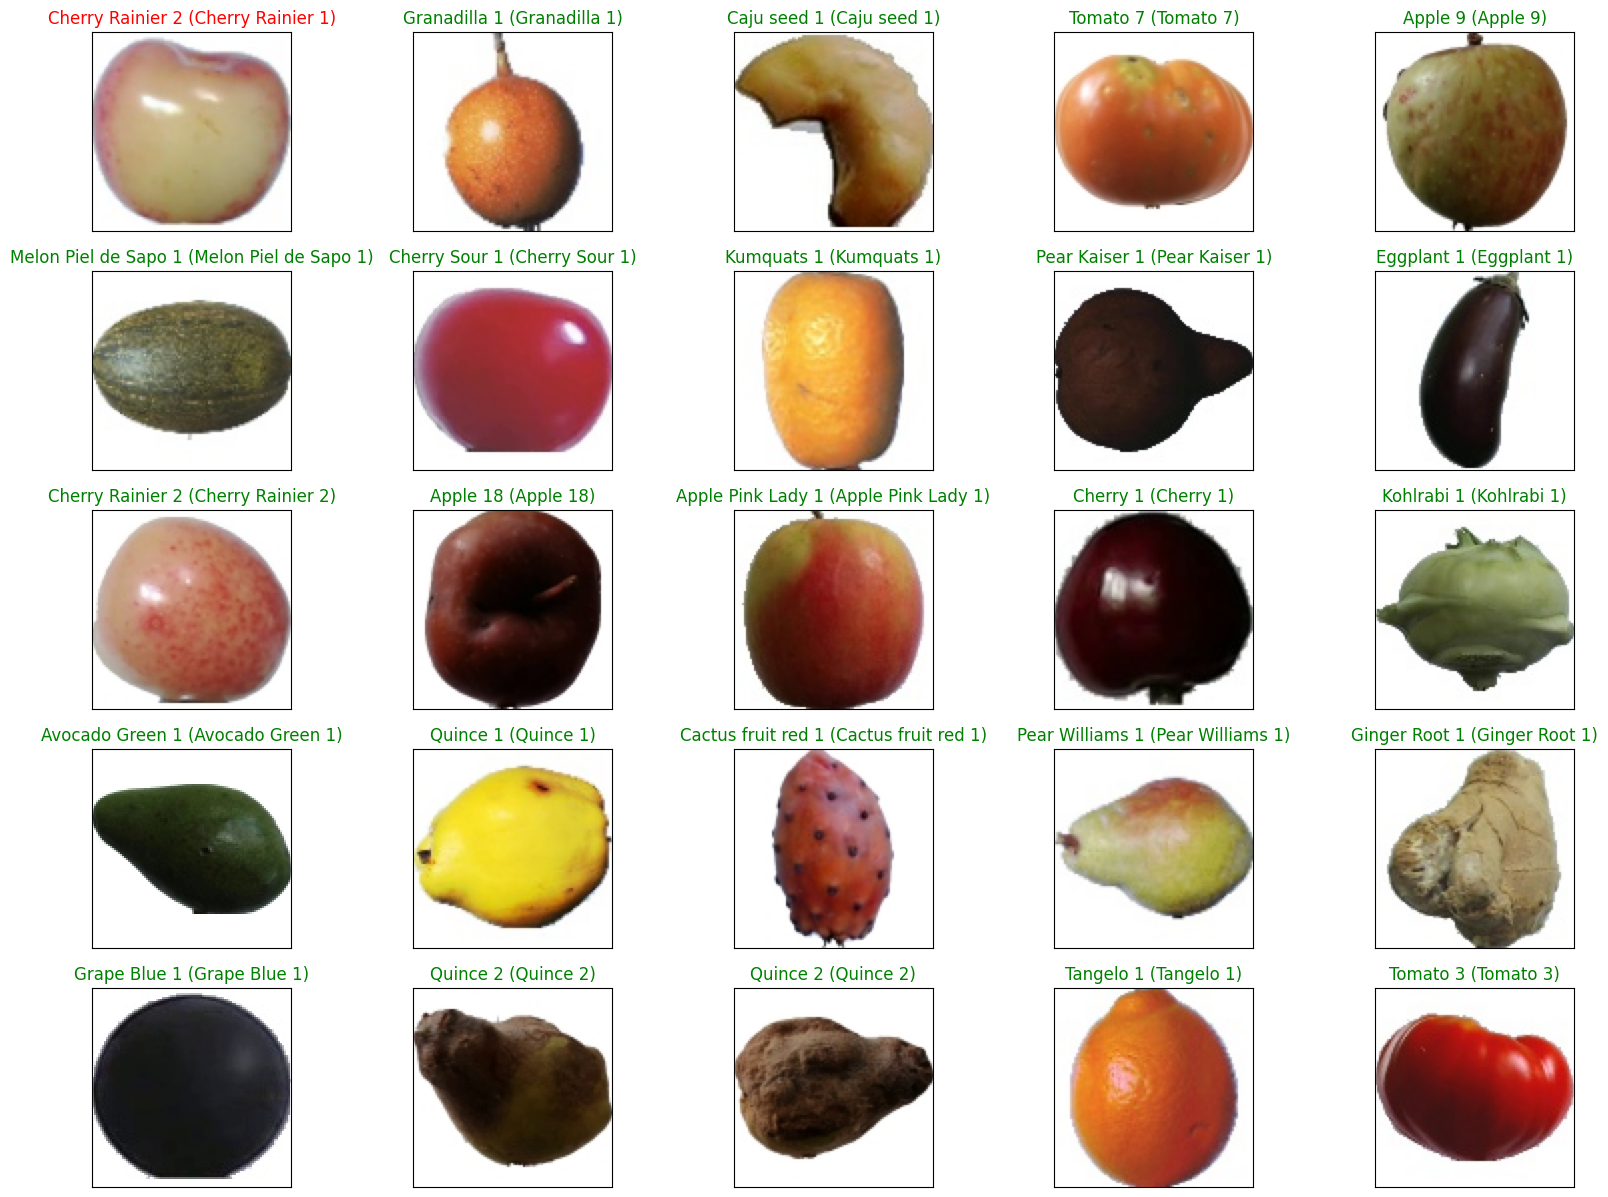

In [18]:
X_test=X_test.astype(np.float32)
fig = plt.figure(figsize=(20, 15))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=25, replace=False)):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(Y_pred[idx])
    true_idx = np.argmax(Y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

### 3. Plot Loss and Accuracy Plots

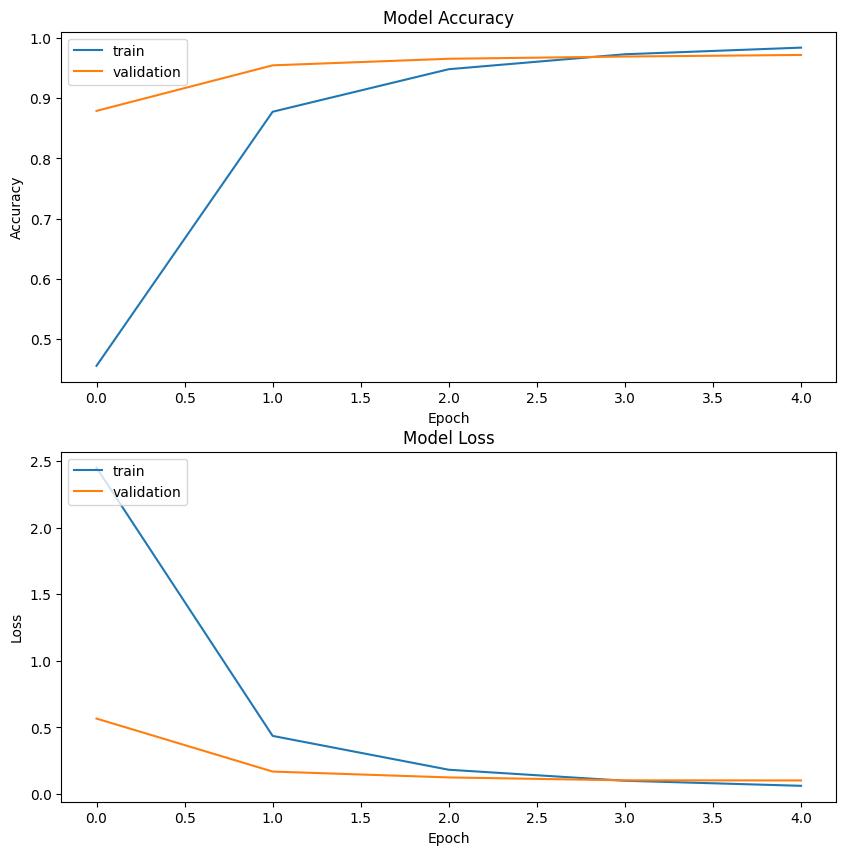

In [19]:
plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(CNN_model.history['accuracy'])  
plt.plot(CNN_model.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(CNN_model.history['loss'])  
plt.plot(CNN_model.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

### 4. Second Approach: Transfer Learning

#### Turn off the training ability of layers

In [5]:

gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

vgg_model = VGG16(input_shape = (100,100,3), weights='imagenet', include_top=False)

for layer in vgg_model.layers:
    layer.trainable = False

#### Build VGG16

In [6]:
transfer_learning_model = Sequential()
#
#
#
#

transfer_learning_model.add(vgg_model)
transfer_learning_model.add(Conv2D(filters=1024,kernel_size=3,activation='relu',padding='same'))
transfer_learning_model.add(MaxPooling2D(pool_size=2))
transfer_learning_model.add(Dropout(0.3))

transfer_learning_model.add(Flatten()) 

transfer_learning_model.add(Dense(units=150,activation='relu'))
transfer_learning_model.add(Dropout(0.4))


transfer_learning_model.add(Dense(units=207,activation='softmax'))


transfer_learning_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 3, 3, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 3, 3, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1, 1, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 150)            │       153,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 207)            │        31,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,619,311 (74.84 MB)

 Trainable params: 4,904,623 (18.71 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

#### Train VGG16

In [7]:


optimizer = Adam()
transfer_learning_model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])


checkpointer = ModelCheckpoint(filepath = 'transfer_learning.h5', save_best_only = True)




train_datagen = ImageDataGenerator(
    rescale=1./255,       
    validation_split=0.2 
)



train_generator = train_datagen.flow_from_directory(
    directory='fruits-360_100x100/data/Training', 
    target_size=(100, 100),   
    batch_size=32,             
    class_mode='categorical',  
    subset='training',         
    shuffle=True,
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    directory='fruits-360_100x100/data/Training',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation',      
    shuffle=True,
    seed=42
)

test_datagen = ImageDataGenerator(rescale=1/255)



# running 
transfer_learning_cnn = transfer_learning_model.fit(
    train_generator,
    epochs=5,
    validation_data=validation_generator,
    callbacks=[checkpointer]
)

Found 83631 images belonging to 207 classes.
Found 20825 images belonging to 207 classes.
Epoch 1/5
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.3332 - loss: 3.0103

2614/2614 ━━━━━━━━━━━━━━━━━━━━ 1316s 503ms/step - accuracy: 0.5675 - loss: 1.7093 - val_accuracy: 0.9100 - val_loss: 0.2799
Epoch 2/5
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.8587 - loss: 0.4355

2614/2614 ━━━━━━━━━━━━━━━━━━━━ 1277s 488ms/step - accuracy: 0.8775 - loss: 0.3748 - val_accuracy: 0.9356 - val_loss: 0.2003
Epoch 3/5
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 1262s 483ms/step - accuracy: 0.9192 - loss: 0.2481 - val_accuracy: 0.9309 - val_loss: 0.2660
Epoch 4/5
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 3044s 1s/step - accuracy: 0.9325 - loss: 0.2059 - val_accuracy: 0.9424 - val_loss: 0.2533
Epoch 5/5
2614/2614 ━━━━━━━━━━━━━━━━━━━━ 1281s 490ms/step - accuracy: 0.9421 - loss: 0.1850 - val_accuracy: 0.9387 - val_loss: 0.2647


#### Evaluate VGG16

In [11]:
## Calculate Test Accuracy

pred=transfer_learning_model.evaluate(X_test,Y_test)
print("loss : ",pred[0])
print("accuracy : ",pred[1])

1090/1090 ━━━━━━━━━━━━━━━━━━━━ 395s 362ms/step - accuracy: 0.9493 - loss: 0.2498
loss :  0.2498110681772232
accuracy :  0.9492599964141846


### 5. Plot Loss and Accuracy Plots


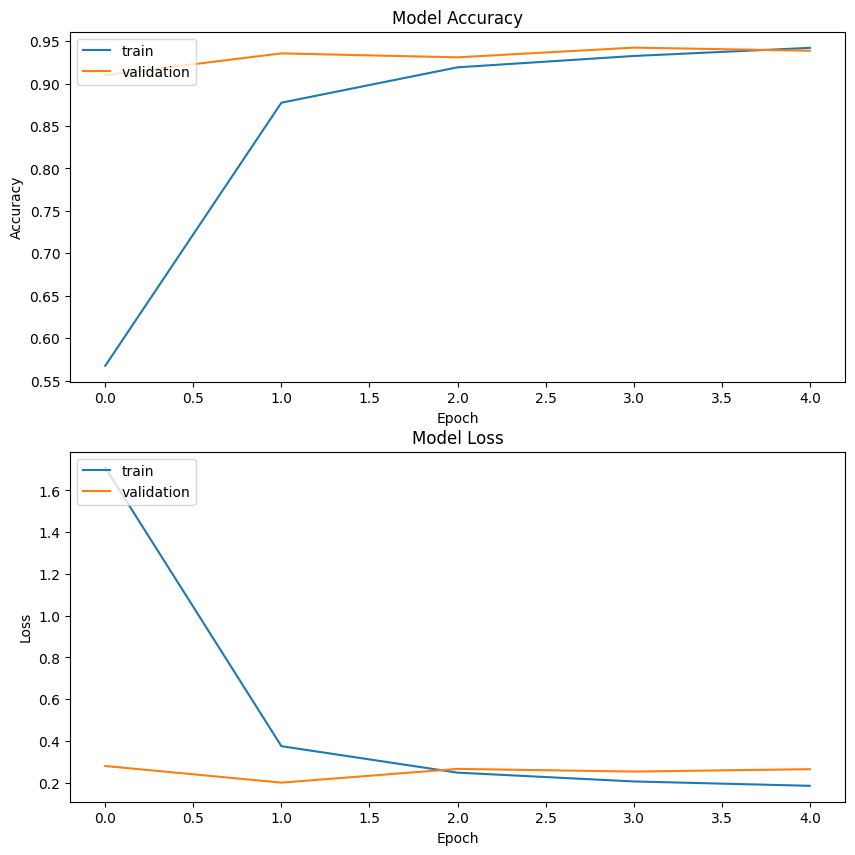

In [13]:
plt.figure(1, figsize = (10, 10))  
plt.subplot(211)  
plt.plot(transfer_learning_cnn.history['accuracy'])  
plt.plot(transfer_learning_cnn.history['val_accuracy'])  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')   

# plotting model loss 
plt.subplot(212)  
plt.plot(transfer_learning_cnn.history['loss'])  
plt.plot(transfer_learning_cnn.history['val_loss'])  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()
